Data Inference and Applied Machine Learning
DIAML: Tutorial 7b
Copyright (c) 2023 Patrick E. McSharry (patrick@mcsharry.net)



Fitting a polynomial to a sinusoid
Study the effect of noisy measurements, over-fitting and evaluation using
in-sample and out-of-sample approaches

In [4]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Data generating process
T = 10
A = 0.5
t = np.linspace(0,1,T)
noise = A*np.random.randn(T,)
x = np.sin(2*np.pi*t)
y = x + noise

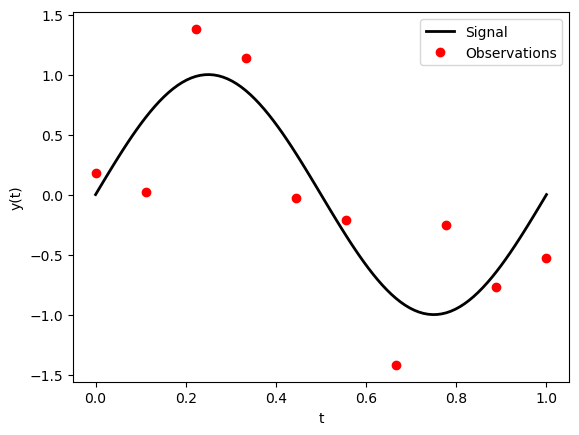

In [10]:
# Visualization
tp = np.linspace(0,1,100)
yp = np.sin(2*np.pi*tp)
plt.plot(tp, yp, color='black', linewidth=2)
plt.plot(t, y, 'ro', markerfacecolor='red')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend(['Signal', 'Observations'])
plt.show()

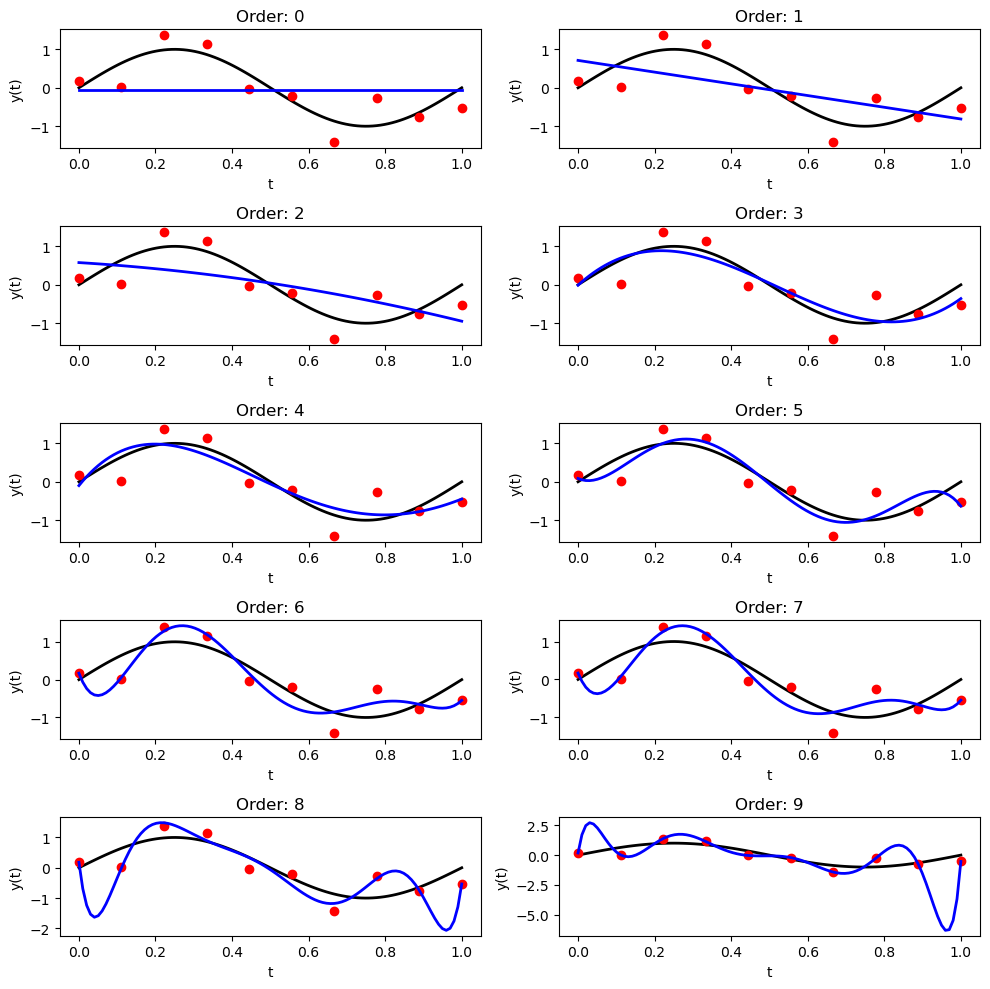

In [22]:
# Loop over polynomials of increasing order and complexity
RMSE = []
RMSEp = []

plt.figure(figsize= (10,10))
for i in range(1, 11):
    plt.subplot(5,2,i)
    b = np.polyfit(t, y, i-1)
    yphat = np.polyval(b,tp)
    plt.plot(tp, np.sin(2*np.pi*tp), color='black', linewidth=2)
    plt.plot(t, y, 'ro', markerfacecolor='red')
    plt.plot(tp, yphat, color='blue', linewidth=2)
    plt.title(f'Order: {i-1}')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    yhat = np.polyval(b,t)
    E = yhat -y
    Ep = yphat - yp
    RMSE.append(np.sqrt(np.mean(E**2)))
    RMSEp.append(np.sqrt(np.mean(Ep**2)))
plt.tight_layout()
plt.show()

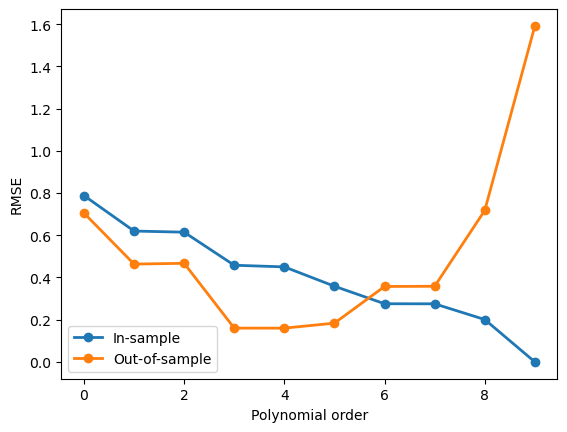

In [24]:
# Monitor effect of complexity on in-sample and out-of-sample error
polyorder = np.arange(0,10)
plt.plot(polyorder, RMSE, 'o-', linewidth=2)
plt.plot(polyorder, RMSEp, 'o-', linewidth=2)
plt.xlabel('Polynomial order')
plt.ylabel('RMSE')
plt.legend(['In-sample', 'Out-of-sample'], loc='lower left')
plt.show()